In [1]:
import os
import numpy as np
import pandas as pd

import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, AutoMinorLocator


In [2]:
def __str2params__(self, paramstr):
    params = {}
    for val in paramstr.split(', '):
        kv = val.split(':', maxsplit=1)
        params[kv[0]] = kv[1]
    return params

In [3]:
def get_summaries(info):   
    summaries = {}
    for name in info:
        summaries[name] = {}
        with open(info[name]) as f:
            summaries[name]['paramstr'] = f.readline().strip()
        summaries[name]['data'] = pd.read_csv(info[name], comment='#')

    for name in summaries:
        summaries[name]['data']['name'] = name
        summaries[name]['data']['image'] = [os.path.splitext(os.path.basename(p))[0] for p in summaries[name]['data'].transpath]

    summary_comb = pd.concat([summaries[name]['data'] for name in summaries])

    summary_df = pd.concat([summaries[name]['data'].loc[
                summaries[name]['data'].groupby('detector').final_rmse.idxmin()][['image','detector', 'name', 'image_objects', 'final_rmse']] \
                for name in summaries]).set_index(['detector','name']).sort_index()
    return summaries, summary_comb, summary_df

In [4]:
def showsummary(summaries, summary_comb, summary_df):
    tbl_cells = [[r[0][0], r[0][1], f'{r[1].final_rmse:.5f}', f'{r[1].image_objects}'] for r in summary_df.iterrows()]

    fig, axs = plt.subplots(figsize=(16,6), ncols=2)

    sb.stripplot(ax=axs[0],data=summary_comb, x='detector',y='final_rmse', 
                dodge = True, hue='name',
                order=['chihiro','clarisse','fio','kiki','nausicaa',
                        'ponyo','san','satsuki','sheeta','sophie'])

    # gridlines between the categories
    axs[0].xaxis.set_minor_locator(MultipleLocator(0.5))
    axs[0].grid(axis='x', which='minor')

    tbl = axs[1].table(cellText=tbl_cells,
                    colLabels = ['Detector', 'Name', 'Final RMSE', 'Image Objects'],
                    loc='center', cellLoc='center',
                    bbox = (0.0,0,1,1) )
    #tbl.auto_set_column_width(col=[0,1])
    tbl.auto_set_font_size(False)
    axs[1].axis('off')
    titlestr = '\n'.join(['{}: {}'.format(n, info[n]) for n in info])
    zz=fig.suptitle(titlestr, size=16)

    botstr = '\n'.join(['{}: {}'.format(n, summaries[n]['paramstr'][2:]) for n in summaries])
    fig.text(0.50, -0.05, botstr, horizontalalignment='center', wrap=True)
    fig.tight_layout()

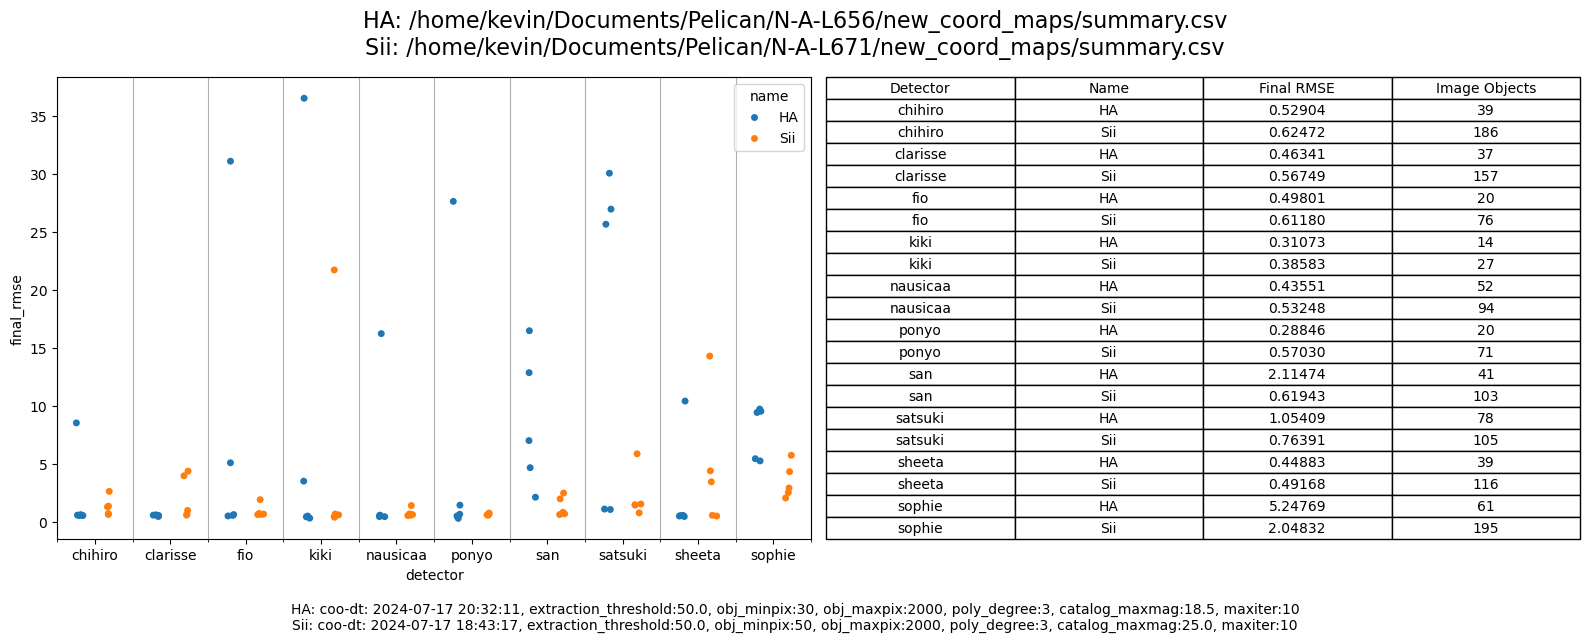

In [14]:
info = {'HA':'/home/kevin/Documents/Pelican/N-A-L656/new_coord_maps/summary.csv',
        'Sii':'/home/kevin/Documents/Pelican/N-A-L671/new_coord_maps/summary.csv',}
summaries, summary_comb, summary_df = get_summaries(info)
showsummary(summaries, summary_comb, summary_df)

In [6]:
summary_comb.columns

Index(['transpath', 'detector', 'image_objects', 'catalog_objects', 'niter',
       'initial_rmse', 'final_rmse', 'extraction_threshold', 'obj_minpix',
       'obj_maxpix', 'poly_degree', 'catalog_maxmag', 'maxiter', 'name',
       'image'],
      dtype='object')

In [16]:
summary_comb.query('detector == \'sophie\' and name == \'HA\'')

,transpath,detector,image_objects,catalog_objects,niter,initial_rmse,final_rmse,extraction_threshold,obj_minpix,obj_maxpix,poly_degree,catalog_maxmag,maxiter,name,image
9,/home/kevin/Documents/Pelican/N-A-L656/new_coo...,sophie,51,2188,9,37.221004,9.533951,50.0,30,2000,3,18.5,10,HA,SUPA01470013
16,/home/kevin/Documents/Pelican/N-A-L656/new_coo...,sophie,57,2235,9,33.167463,9.720710,50.0,30,2000,3,18.5,10,HA,SUPA01469983
18,/home/kevin/Documents/Pelican/N-A-L656/new_coo...,sophie,78,2274,7,29.844267,5.437021,50.0,30,2000,3,18.5,10,HA,SUPA01469993
20,/home/kevin/Documents/Pelican/N-A-L656/new_coo...,sophie,61,2335,8,32.023465,5.247691,50.0,30,2000,3,18.5,10,HA,SUPA01470023
26,/home/kevin/Documents/Pelican/N-A-L656/new_coo...,sophie,53,2050,4,34.047658,9.426127,50.0,30,2000,3,18.5,10,HA,SUPA01470003
